In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
from read import read_data_iterator
from collections import Counter

In [2]:
dataset = list(read_data_iterator('dataset/gw_extractions.pickle'))

In [3]:
dataset[0]

{'candidates': [(None, 'believe', 'the increasing demands'),
  (None, "'ve gotten", 'Part'),
  ('film', 'certainly is', None),
  (None, 'has', 'point'),
  ('even more damage', 'hustled', None)],
 'correct': 3,
 'entity': 'My father, a former movie exhibitor who taught me to respect\na theater like a cathedral',
 'final_sentence': 'He has a point.',
 'sentences': ['My father, a former movie exhibitor who taught me to respect\na theater like a cathedral, ran into that situation when\nhe saw Walk the Line in its opening week at\n',
  "He reported it to\na manager, who didn't know what to do except apologize\nand hand out passes for a return trip.\n\n\n",
  'I got an e-mail from a 35-year veteran projectionist (he\nasked to remain anonymous) who generalized them as "teenage boys\npaid minimum wage, Burger King rejects, versus unionized, career professionals\n(who are) paid quite well, able to solve every technical\nand mechanical problem in a complex booth without having to\ncall in a serv

In [4]:
event_chain_lengths = [len(d['sentences']) for d in dataset]
sentence_lengths = [len(s.split()) for d in dataset for s in d['sentences']] + [len(d['final_sentence'].split()) for d in dataset]
entity_subject = [s[0] is None for d in dataset for s in d['triples']]

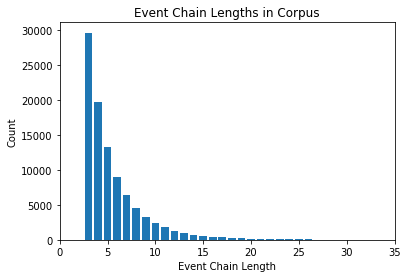

In [5]:
chain_length_counter = Counter(event_chain_lengths)


plt.bar(chain_length_counter.keys(), chain_length_counter.values())
plt.xlim(0, 35)
plt.ylabel("Count")
plt.xlabel("Event Chain Length")
plt.title("Event Chain Lengths in Corpus")
plt.savefig('event_chain_length.png')

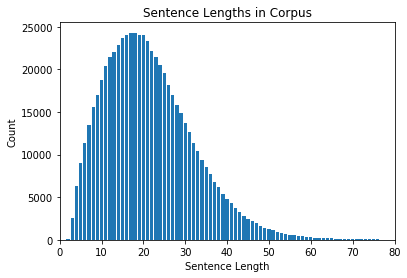

In [6]:
sentence_length_counter = Counter(sentence_lengths)


plt.bar(sentence_length_counter.keys(), sentence_length_counter.values())
plt.xlim(0, 80)
plt.ylabel("Count")
plt.xlabel("Sentence Length")
plt.title("Sentence Lengths in Corpus")
plt.savefig('sentence_length.png')

In [10]:
print(subj_obj_counter[True], subj_obj_counter[False], subj_obj_counter[True] + subj_obj_counter[False])
468737/532374

468737 63637 532374


0.8804656125205212

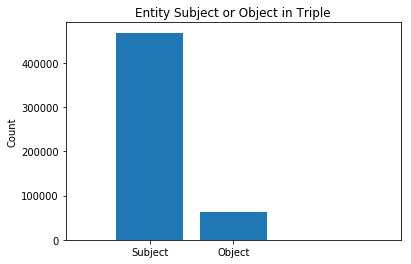

In [7]:
subj_obj_counter = Counter(entity_subject)

plt.bar(['Subject', 'Object'], [subj_obj_counter[True], subj_obj_counter[False]])
plt.xlim(-1, 3)
plt.ylabel("Count")
plt.title("Entity Subject or Object in Triple")
plt.savefig('subj_obj.png')

In [28]:
import os
os.getcwd()

'/tf/mounted/cis700/script-learning'